In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problema Banco

In [22]:
df = pd.read_csv('base_banco.csv')
df

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,9120.0,13,0,6,0,2.0
1,0.957151,40,0,2600.0,4,0,0,0,1.0
2,0.658180,38,1,3042.0,2,1,0,0,0.0
3,0.233810,30,0,3300.0,5,0,0,0,0.0
4,0.907239,49,1,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...
120264,0.385742,50,0,3400.0,7,0,0,0,0.0
120265,0.040674,74,0,2100.0,4,0,1,0,0.0
120266,0.299745,44,0,5584.0,4,0,1,0,2.0
120267,0.000000,30,0,5716.0,4,0,0,0,0.0


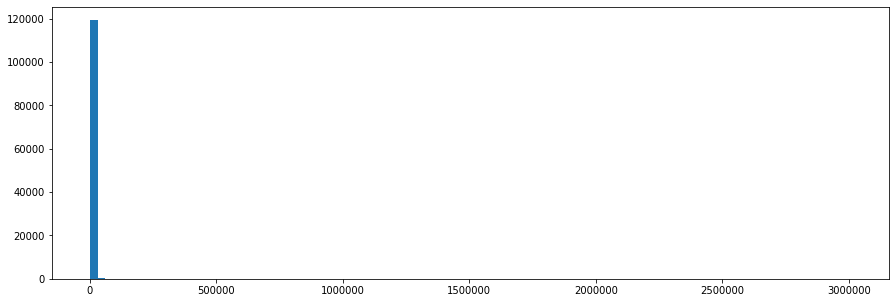

In [23]:
plt.figure(figsize=(15,5))
plt.hist(df.MonthlyIncome, bins = 100); #problema com muitos ganhando pouco e poucos ganahando muito (ah vá!)

In [24]:
np.logspace(0, 3, 10) #escalar logarítmicae base 10, as barras ficam mais largas para rendas mais altas

array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ])

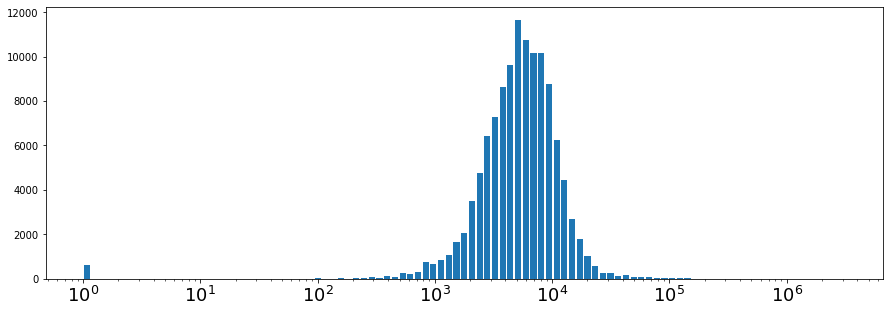

In [25]:
plt.figure(figsize=(15,5))
plt.hist(df.MonthlyIncome, bins = np.logspace(0, 6.5, 100), rwidth=.8)
plt.xscale('log')
plt.xticks(fontsize=18);

In [26]:
#renda média de 6 mil

# Plot Scatter para ver Renda X Idade

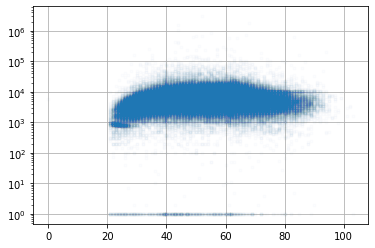

In [27]:
plt.plot(df.age, df.MonthlyIncome, '.', alpha = 0.01)
plt.yscale('log')
plt.grid()

# Histogramas em faixas de idades

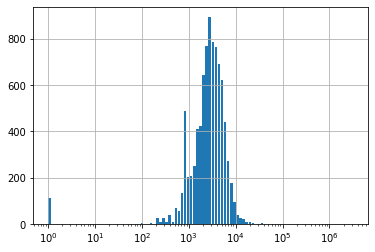

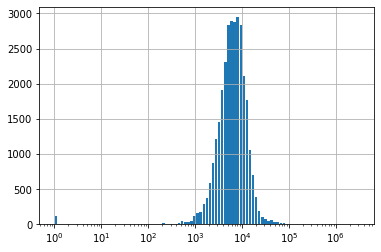

In [28]:
plt.figure()
plt.hist(df.loc[(df.age>=20) & (df.age<=30)].MonthlyIncome, bins= np.logspace(0, 6.5, 100), rwidth=.8)
plt.xscale('log')
plt.grid()

plt.figure()
plt.hist(df.loc[(df.age>=50)& (df.age<=60)].MonthlyIncome, bins= np.logspace(0, 6.5, 100), rwidth=.8)
plt.xscale('log')
plt.grid()

# Separar em variáveis preditivas  e variável resposta

In [29]:
x = df.drop('MonthlyIncome', axis=1)
y = df.MonthlyIncome

# Separação em Treino e Teste

In [30]:
x.shape #para não precisar voltar sempre no número de linhas para conferir

(120269, 8)

In [31]:
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=.3)

# Treinar o Modelo

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=-1)
rf.fit(x_tr, y_tr)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
y_ts

108001     3200.0
52715      7519.0
18656     11853.0
51098      2400.0
33211     11000.0
           ...   
118442     5500.0
73002      2375.0
57306     10000.0
7048      12875.0
69758      3550.0
Name: MonthlyIncome, Length: 36081, dtype: float64

In [34]:
rf.predict(x_ts) #prediz o conjunto de teste

array([ 7388.51239478,  7860.20545579,  7311.68715083, ...,
       10641.2752096 ,  7420.60789357,  6376.14094671])

In [15]:
erro = y_ts - rf.predict(x_ts)
erro

118806     1617.648188
105319      676.428574
81476     -1962.588980
107515    -2979.717289
65566     -2549.474889
              ...     
53097     12281.381971
27589      7108.339739
29077       285.701546
112921     -807.553834
44654      7176.417982
Name: MonthlyIncome, Length: 36081, dtype: float64

In [16]:
erro.mean()

-135.862587240448

In [17]:
erro_abs=np.abs(y_ts - rf.predict(x_ts))  #módulo
erro_abs

118806     1617.648188
105319      676.428574
81476      1962.588980
107515     2979.717289
65566      2549.474889
              ...     
53097     12281.381971
27589      7108.339739
29077       285.701546
112921      807.553834
44654      7176.417982
Name: MonthlyIncome, Length: 36081, dtype: float64

In [18]:
erro_abs.mean()

3171.942043905878

In [19]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error (y_ts, rf.predict(x_ts))

3171.942043905849

# Histogramas

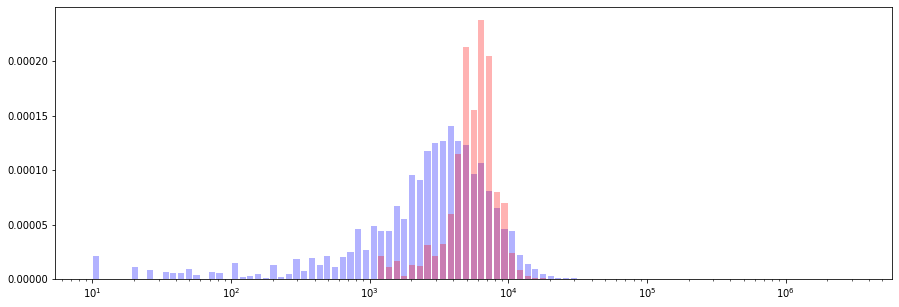

In [20]:
plt.figure(figsize=(15,5))
plt.hist(y_ts, bins=np.logspace(1, 6.5, 100), color='b', alpha=.30, density=True, rwidth=.8, label='Realidade')
plt.hist(rf.predict(x_ts), bins=np.logspace(1, 6.5, 100), color='r', alpha=.30, density=True, rwidth=.8, label='Teste')
plt.xscale('log');

Problemas do Modelo

- muito concentrado
- subestimando quem tem renda muito alta
- superestimando maior parte